## Notebook to read data and plot it from the UCLA Quasilinear diffusion simulation

@author Riley Troyer
science@rileytroyer.com

In [2]:
# Needed libraries
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import scipy.io
from scipy.interpolate import interp1d
from scipy.stats import pearsonr
import scipy.stats as stats

In [3]:
# Directories for notebook

#field_type = 'E' # 'E' or 'B'

# Data filename
# data_dir = '../../data/external/ucla-simulation/2023-02-17/'
# data_filename = data_dir + 'FP2D_LUchorus_jsim.mat'
# data_dir = '../../data/external/ucla-simulation/2023-03-17/'
# flux_filename = data_dir + 'jsim_spinoutL5_meredith_ae3.mat'
# t_ek_filename = data_dir + 'sim_t_ek.mat'
# bw_max_filename = data_dir + 'Bw_AE_L_MLT_Nigel.txt'

data_dir = '../../data/external/ucla-simulation/2023-03-30/'
flux_filename = data_dir + 'jsim_spin_outL5.5_BwfromRT.mat'
t_ek_filename = data_dir + 'sim_t_ek.mat'

In [4]:
# Read in simulation data
flux_mat = scipy.io.loadmat(flux_filename)
t_ek_mat = scipy.io.loadmat(t_ek_filename)

flux = flux_mat['jsim']

energy = t_ek_mat['ek']*1e3

simulation_time = t_ek_mat['t_sim']

# Select energy bin
low_energy_cutoff = 14
mid_energy_cutoff = 30
high_energy_cutoff = 125
low_energy_selector = ((energy[:, 0] < mid_energy_cutoff) 
                       & (energy[:, 0] >= low_energy_cutoff))
high_energy_selector = ((energy[:, 0] <= high_energy_cutoff) 
                       & (energy[:, 0] >= mid_energy_cutoff))
#print(f'Energy: {energy[n][0]:0.2f} keV')

# Flux to plot
low_plot_flux = np.sum(flux[low_energy_selector, :], axis=0)
high_plot_flux = np.sum(flux[high_energy_selector, :], axis=0)

# Scale flux 
low_plot_flux = low_plot_flux/np.max(low_plot_flux)
high_plot_flux = high_plot_flux/np.max(high_plot_flux)

# Create a best fit exponential
low_time_cutoff = 0
high_time_cutoff = low_time_cutoff + 30
time_selector = ((simulation_time[0] <= high_time_cutoff) 
                 & (simulation_time[0] >= low_time_cutoff))
x = simulation_time[0][time_selector]

# X range to plot against
plot_x = np.linspace(0, 120, 1000)

low_y = np.log(low_plot_flux[time_selector])
high_y = np.log(high_plot_flux[time_selector])

# Linear regression fit
(low_slope, low_intercept, 
 low_r_value, low_p_value, low_std_err) = stats.linregress(x, low_y)
(high_slope, high_intercept, 
 high_r_value, high_p_value, high_std_err) = stats.linregress(x, high_y)

low_best_fit = low_slope*x + low_intercept
high_best_fit = high_slope*x + high_intercept

low_tau = (-1/low_slope)
high_tau = (-1/high_slope)

# Calculate the Pearson correlation coefficient
#r, p = pearsonr(y, best_fit)

In [5]:
flux = flux_mat['jsim']

energy = t_ek_mat['ek']*1e3

simulation_time = t_ek_mat['t_sim']

# Loop through all energies, get decay rate to find max
for n in range(energy.shape[0]):
    
    # Get the flux
    flux_n = np.log(flux[n, :])

    # Make a linear approximation of the log
    slope, intercept, r, p, std_err = stats.linregress(simulation_time[0][time_selector], flux_n[time_selector])
    if (energy[n, 0] >= 14) & (energy[n, 0] <= 125):
        print(f'Energy: {energy[n, 0]:0.2f}, timescale: {(-1/slope)/60:0.2f}.')


Energy: 14.19, timescale: 43.19.
Energy: 15.02, timescale: 13.21.
Energy: 15.91, timescale: 7.98.
Energy: 16.84, timescale: 5.85.
Energy: 17.83, timescale: 4.66.
Energy: 18.87, timescale: 3.93.
Energy: 19.98, timescale: 3.43.
Energy: 21.15, timescale: 3.06.
Energy: 22.38, timescale: 2.79.
Energy: 23.69, timescale: 2.58.
Energy: 25.07, timescale: 2.40.
Energy: 26.52, timescale: 2.27.
Energy: 28.06, timescale: 2.15.
Energy: 29.69, timescale: 2.06.
Energy: 31.41, timescale: 1.98.
Energy: 33.23, timescale: 1.92.
Energy: 35.15, timescale: 1.87.
Energy: 37.17, timescale: 1.83.
Energy: 39.31, timescale: 1.80.
Energy: 41.57, timescale: 1.79.
Energy: 43.95, timescale: 1.78.
Energy: 46.46, timescale: 1.80.
Energy: 49.11, timescale: 1.82.
Energy: 51.90, timescale: 1.86.
Energy: 54.85, timescale: 1.93.
Energy: 57.95, timescale: 2.01.
Energy: 61.23, timescale: 2.12.
Energy: 64.67, timescale: 2.25.
Energy: 68.30, timescale: 2.43.
Energy: 72.12, timescale: 2.64.
Energy: 76.15, timescale: 2.91.
Energy

/tmp/ipykernel_1545950/187950872.py:36: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


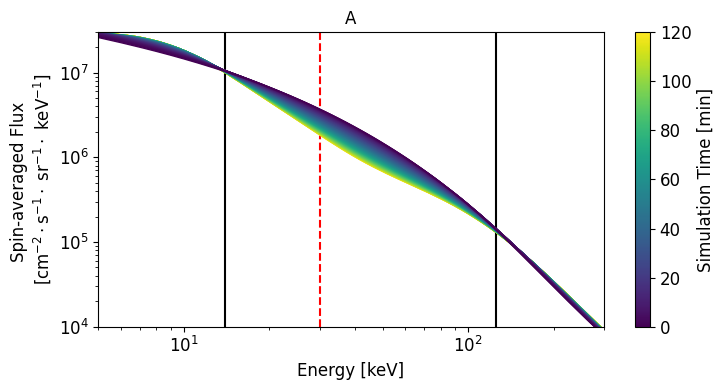

In [6]:
# Create plot
fig, ax = plt.subplots(figsize=(7.5, 4))

ax.tick_params(axis='both', labelsize=12)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e4, 3e7)
ax.set_xlim(5, 3e2)

ax.set_title('A', fontsize=12)
ax.set_ylabel('Spin-averaged Flux \n'
              r'[cm$^{-2} \cdot$'
              r's$^{-1} \cdot$ sr$^{-1} \cdot$ keV$^{-1}$]', fontsize=12)
ax.set_xlabel('Energy [keV]', fontsize=12)

# Define colorbar mapping function
sm = cm.ScalarMappable(cmap='viridis')
sm.set_array(simulation_time)

# Create vertical line
ax.vlines((14, 30, 125), 1e4, 3e7, colors=('black', 'red', 'black'),
          linestyles=('-', '--', '-'))

# X data
x = energy

# Loop through each time and plot flux
for i in reversed(range(simulation_time.shape[1])):
    
    # Y data and plot
    y = flux[:, i]
    ax.plot(x, y, color=plt.cm.viridis(i/simulation_time.shape[1]),
           linewidth=1)

# Create colorbar
cbar = fig.colorbar(sm)
cbar.set_label('Simulation Time [min]', fontsize=12)
cbar.ax.tick_params(labelsize=12)

plt.tight_layout()

# Save the figure
img_filename ='../../reports/presentation-figures/a-flux-energy-time-plot-ucla.jpg'
#plt.savefig(img_filename, dpi=250)

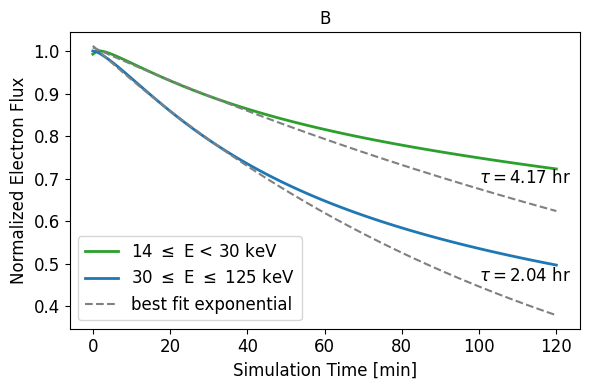

In [7]:
# Plot the data
fig, ax = plt.subplots(figsize=(6, 4))

ax.tick_params(axis='both', labelsize=12)

ax.set_title('B', fontsize=12)
ax.set_ylabel('Normalized Electron Flux', fontsize=12)
ax.set_xlabel('Simulation Time [min]', fontsize=12)

ax.plot(simulation_time[0], low_plot_flux,
         linewidth=2, color='C2', label=r'14 $\leq$ E < 30 keV')
ax.plot(plot_x, np.exp(low_intercept)*np.exp(plot_x*low_slope),
        linestyle='--', color='gray')

ax.plot(simulation_time[0], high_plot_flux,
         linewidth=2, color='C0', label=r'30 $\leq$ E $\leq$ 125 keV')
ax.plot(plot_x, np.exp(high_intercept)*np.exp(plot_x*high_slope),
        linestyle='--', color='gray',
        label=(fr'best fit exponential'))

# Create text for each tau
ax.text(100, 0.69, fr'$\tau = ${low_tau/60:0.2f} hr', fontsize=12)
ax.text(100, 0.46, fr'$\tau = ${high_tau/60:0.2f} hr', fontsize=12)

ax.legend(fontsize=12, loc='lower left')

plt.tight_layout()

# Save the figure
img_filename = '../../reports/presentation-figures/b-high-low-energy-timescale-ucla.jpg'
#plt.savefig(img_filename, dpi=250)